Training data
Cost after iteration 0 = 1.510105160352171
Cost after iteration 10 = 0.6248048876502701
Cost after iteration 20 = 0.3416406880530245
Cost after iteration 30 = 0.22211062444949067
Cost after iteration 40 = 0.16141815353936584
Cost after iteration 50 = 0.12638939731085813
Cost after iteration 60 = 0.10422691820312073
Cost after iteration 70 = 0.08921902057434503
Cost after iteration 80 = 0.07851611401561143
Cost after iteration 90 = 0.0705675528028289
Cost after iteration 100 = 0.06446903597810257
Cost after iteration 110 = 0.05966278609631185
Cost after iteration 120 = 0.055788638621869203
Cost after iteration 130 = 0.052605076838863264
Cost after iteration 140 = 0.04994494974980172
Cost after iteration 150 = 0.047689428482693724
Cost after iteration 160 = 0.04575205920817557
Cost after iteration 170 = 0.04406865868504874
Cost after iteration 180 = 0.042590721270146174
Cost after iteration 190 = 0.04128100574399523
Cost after iteration 200 = 0.0401105136604956
Cost after i

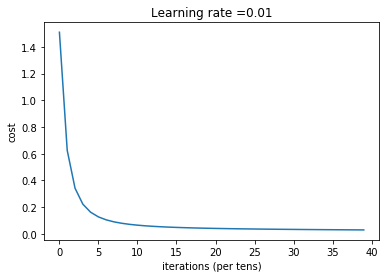

train accuracy: 97.72727272727273 %
test accuracy: 89.28571428571429 %


In [74]:
import numpy as np
import csv
import emoji
import matplotlib.pyplot as plt
%matplotlib inline 

def read_csv(filename):     #read dataset files
    phrase = []
    emoji = []

    with open (filename) as csvDataFile:
        csvReader = csv.reader(csvDataFile)
        for row in csvReader:
            phrase.append(row[0])
            emoji.append(row[1])
    X = np.asarray(phrase)
    Y = np.asarray(emoji, dtype=int)
    return X, Y

def label_to_emoji(label):    #Converts a label into the corresponding emoji code (string) from emoji module
    return emoji.emojize(emoji_dictionary[str(label)], use_aliases=True)

def convert_to_one_hot(Y, C):   #Converts Y from its current shape (m,1) into a one-hot representation (m, n_y(no. of classes))
    Y = np.eye(C)[Y.reshape(-1)]
    return Y

def convert_to_glove_vect(glove_file):
    with open(glove_file, 'r',encoding='utf8') as f:
        words = set()
        word_to_vec_map = {}
        for line in f:
            line = line.strip().split()
            curr_word = line[0]
            words.add(curr_word)
            word_to_vec_map[curr_word] = np.array(line[1:], dtype=np.float64)
        
        i = 1
        words_to_index = {}
        index_to_words = {}
        for w in sorted(words):
            words_to_index[w] = i
            index_to_words[i] = w
            i = i + 1
    return words_to_index, index_to_words, word_to_vec_map

X_train, Y_train = read_csv('data/train_data.csv')
X_test, Y_test = read_csv('data/test_data.csv')

word_to_index, index_to_word, word_to_vec_map = convert_to_glove_vect('C:/Users/DELL/Desktop/Emojify/glove.6B.50d.txt')

def sentence_to_avg(sentence, word_to_vec_map):
    words = [i.lower() for i in sentence.split()]
    avg = np.zeros((50,))
    total = 0
    for w in words:
        total += word_to_vec_map[w]
    avg = total / len(words)
    return avg

def predict(X, Y, W, b, word_to_vec_map): #Predicts the accuracy of the model
    m = X.shape[0]
    pred = np.zeros((m, 1))
    for j in range(m):                       
        # Split jth test example (sentence) into list of lower case words
        words = X[j].lower().split()
        # Average words' vectors
        avg = np.zeros((50,))
        for w in words:
            avg += word_to_vec_map[w]
        avg = avg/len(words)
        # Forward propagation
        Z = np.dot(W, avg) + b
        A = softmax(Z)
        pred[j] = np.argmax(A)        
    #print("Accuracy: "  + str(np.mean((pred[:] == Y.reshape(Y.shape[0],1)[:]))))
    accuracy= np.mean((pred[:] == Y.reshape(Y.shape[0],1)[:]))
    return pred, accuracy

def model(X, Y, X_test, Y_test, word_to_vec_map, learning_rate = 0.01, num_iterations = 400):
    costs=[]
    # Define number of training examples
    m = Y.shape[0]                          # number of training examples
    n_y = 5                                 # number of classes  
    n_h = 50                                # dimensions of the GloVe vectors 
    # Initializing parameters
    W = np.random.randn(n_y, n_h) / np.sqrt(n_h)
    b = np.zeros((n_y,))  
    # Convert Y to Y_onehot with n_y classes
    Y_oh = convert_to_one_hot(Y, C = n_y)   
    
    for t in range(num_iterations): 
        for i in range(m):          
            avg = sentence_to_avg(X[i], word_to_vec_map)
            # Forward prop
            z = np.dot(W, avg)+ b
            a = softmax(z)
            # Compututation of cost
            cost = -1* (np.sum(np.multiply(Y_oh[i], np.log(a))))
            # Compute gradients 
            dz = a - Y_oh[i]
            dW = np.dot(dz.reshape(n_y,1), avg.reshape(1, n_h))
            db = dz
            # Update parameters with Stochastic Gradient Descent
            W = W-learning_rate*dW
            b = b-learning_rate*db
        
        if t % 10 == 0:
            print("Cost after iteration " + str(t) + " = " + str(cost))
            costs.append(cost)
    pred1, accuracy1 = predict(X, Y, W, b, word_to_vec_map)
    pred2 , accuracy2 = predict(X_test, Y_test, W, b, word_to_vec_map)
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    return pred1, W, b, accuracy1, accuracy2 
print("Training data")
pred1, W, b, accuracy1, accuracy2 = model(X_train, Y_train, X_test, Y_test, word_to_vec_map)
print("train accuracy: {} %".format(accuracy1 * 100))
print("test accuracy: {} %".format(accuracy2 * 100))